<a href="https://colab.research.google.com/github/MariaFriess/ml_colab/blob/main/segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# !pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df_row = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(f"First 5 records:\n", df_row.head())

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
First 5 records:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


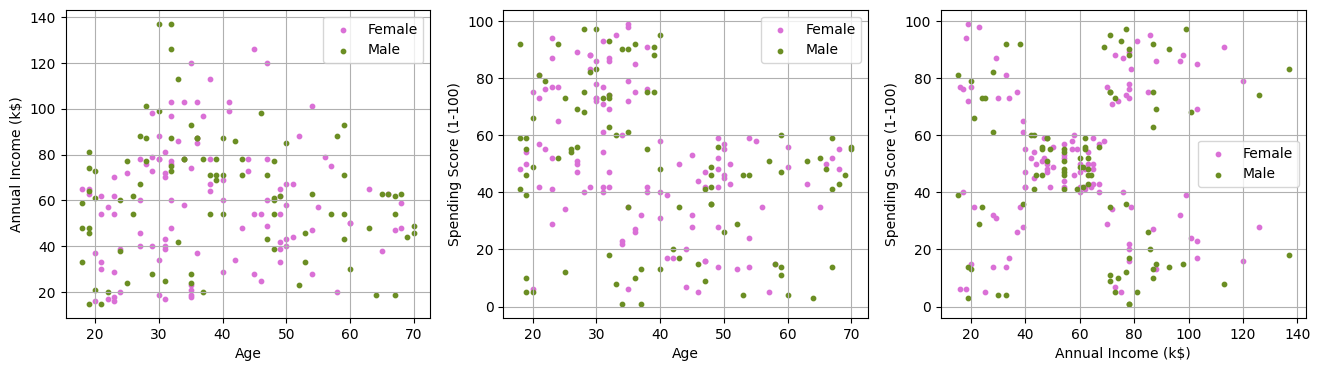

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
features = df_row.columns[2:]

col=0
for i in range(len(features)-1):
  for j in range(i+1, len(features)):
    feature1 = features[i]
    feature2 = features[j]

    ax[col].scatter(df_row[feature1][df_row['Gender'] == 'Female'], df_row[feature2][df_row['Gender'] == 'Female'], c='orchid', label='Female', s=10)
    ax[col].scatter(df_row[feature1][df_row['Gender'] == 'Male'], df_row[feature2][df_row['Gender'] == 'Male'], c='olivedrab', label='Male', s=10)
    ax[col].grid(True)
    ax[col].set_xlabel(feature1)
    ax[col].set_ylabel(feature2)
    ax[col].legend()
    col+=1

plt.show()

In [ ]:
from sklearn.cluster import KMeans


data = df_row[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
data['Gender'] = df_row['Gender'] == 'Male'

clusters_n = 5
model = KMeans(clusters_n)

pred = model.fit_predict(data)
data

,Annual Income (k$),Spending Score (1-100),Gender
0,15,39,True
1,15,81,True
2,16,6,False
3,16,77,False
4,17,40,False
...,...,...,...
195,120,79,False
196,126,28,False
197,126,74,True
198,137,18,True


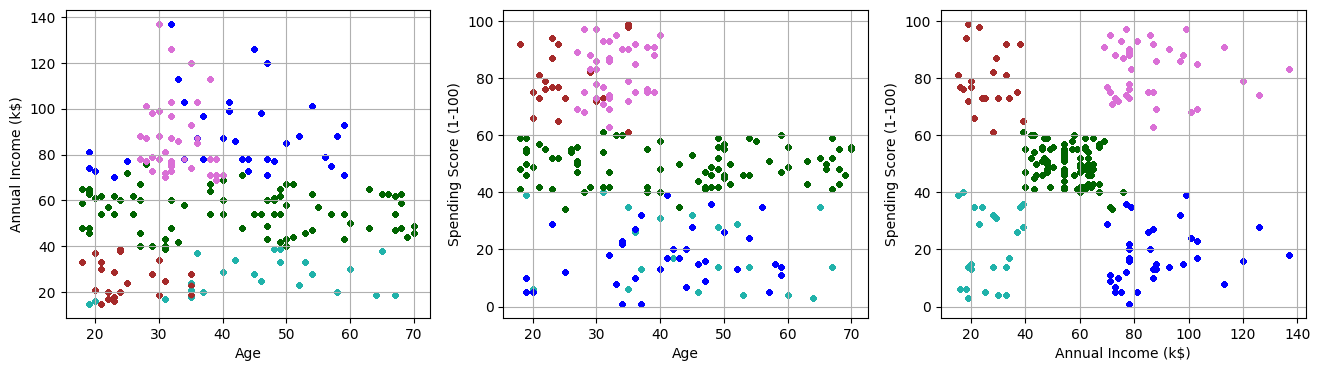

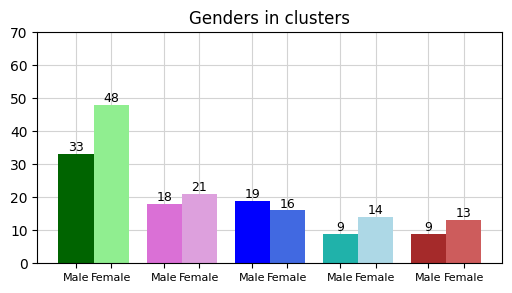

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_pred = df_row.copy()
features = df_pred.columns[2:]
df_pred['Pred'] = pred

colors = ['darkgreen', 'orchid', 'blue', 'lightseagreen', 'brown']

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
col=0
for i in range(len(features)-1):
  for j in range(i+1, len(features)):
    feature1 = features[i]
    feature2 = features[j]
    for c in pred:
      ax[col].scatter(df_pred[feature1][pred == c], df_pred[feature2][pred == c], c=colors[c], s=10)
    ax[col].grid(True)
    ax[col].set_xlabel(feature1)
    ax[col].set_ylabel(feature2)
    col+=1


colors_g = np.array([('darkgreen', 'lightgreen'), ('orchid', 'plum'), ('blue', 'royalblue'), ('lightseagreen', 'lightblue'), ('brown', 'indianred')])

fig, ax = plt.subplots(figsize=(6, 3))
width = 0.4
x = np.arange(clusters_n)
x_male = np.array(x - width/2)
x_female = x + width/2


male_in_clusters = df_pred[df_pred['Gender'] == 'Male'].groupby(['Pred'])['Gender'].count()
female_in_clusters = df_pred[df_pred['Gender'] == 'Female'].groupby(['Pred'])['Gender'].count()
ax.bar(x_male, male_in_clusters, width=width, color=colors_g[:, 0], label='Male')
ax.bar(x_female, female_in_clusters, width=width, color=colors_g[:, 1], label='Female')
ax.bar_label(ax.containers[0], fontsize=9)
ax.bar_label(ax.containers[1], fontsize=9)
ax.set_xticks(np.stack([x_male, x_female]).flatten(), labels=['Male']*5+['Female']*5, fontsize=8)
ax.set_yticks(np.arange(0, 75, 10))
ax.set_axisbelow(True)
ax.grid(True, color='lightgray')
ax.set_title('Genders in clusters')

plt.show()